In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import joblib

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [4]:
df.Country.value_counts()

Pakistan          1
Moldova           1
India             1
Mauritius         1
Ivory Coast       1
                 ..
Uzbekistan        1
Czech Republic    1
France            1
Paraguay          1
Brazil            1
Name: Country, Length: 158, dtype: int64

In [5]:
df['Happiness Rank'].value_counts()

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64

### columns such as country and region are not relevant as do not have a direct relation with target variable happiness score. Above data just gives a record of happiness of a country of a specific region. Happiness rank is just ranking of happiness score. hence drop columns country, region & happiness rank

In [6]:
df=df.drop(['Country','Region','Happiness Rank'],axis=1)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

### datatype is float. Happiness score is target variable. we shall check the correlation of diff columns in relation with happiness score

In [8]:
df.corr()['Happiness Score']

Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

### from the above I can conclude that columns standard error, trust, generosity can be dropped (for good correlation >=+/- 0.5)

In [9]:
df=df.drop(['Standard Error','Trust (Government Corruption)','Generosity'],axis=1)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,1.83302


In [10]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (158, 6)


In [11]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


### check outliers

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

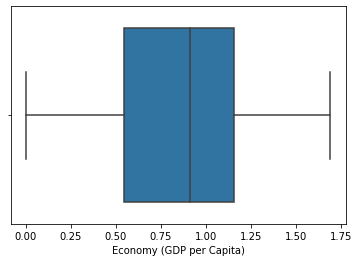

In [12]:
sn.boxplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family'>

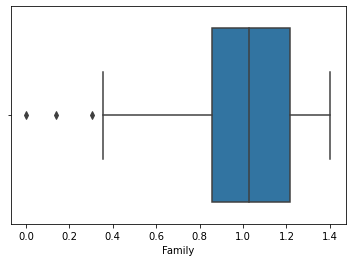

In [13]:
sn.boxplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

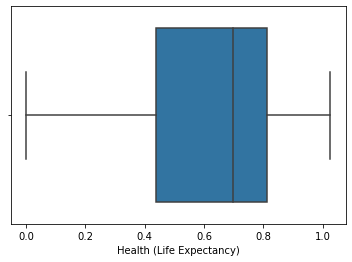

In [14]:
sn.boxplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom'>

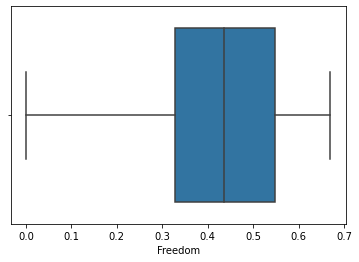

In [15]:
sn.boxplot(df['Freedom'])

<AxesSubplot:xlabel='Dystopia Residual'>

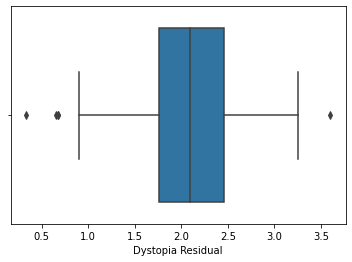

In [16]:
sn.boxplot(df['Dystopia Residual'])

### there are outliers present in dystopia residual & family column. lets try to remove them

In [17]:
df[df.apply(zscore)<=3].shape

(158, 6)

In [18]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(150, 6)

In [19]:
((158-150)/158)*100

5.063291139240507

### outlier was removed using iqr with a data loss of 5%. cross check

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

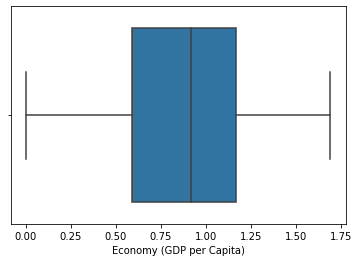

In [20]:
sn.boxplot(data_clean['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family'>

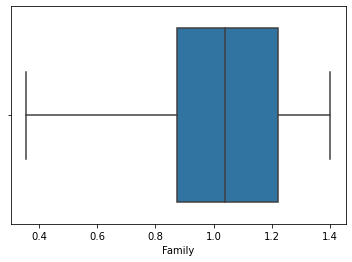

In [21]:
sn.boxplot(data_clean['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

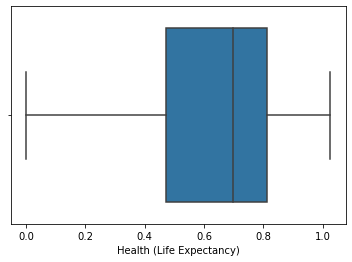

In [22]:
sn.boxplot(data_clean['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom'>

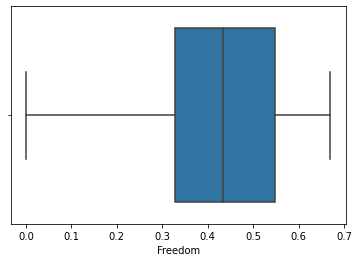

In [23]:
sn.boxplot(data_clean['Freedom'])

<AxesSubplot:xlabel='Dystopia Residual'>

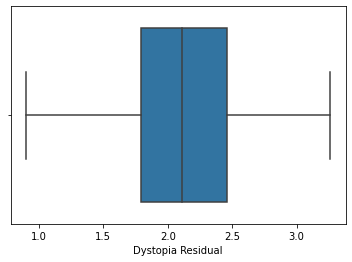

In [24]:
sn.boxplot(data_clean['Dystopia Residual'])

In [25]:
data_clean

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...
149,3.656,0.17417,0.46475,0.24009,0.37725,1.99172
150,3.655,0.46534,0.77115,0.15185,0.46866,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,1.46494
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328


In [26]:
data_clean[data_clean['Economy (GDP per Capita)']==0.0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
119,4.517,0.0,1.0012,0.09806,0.22605,2.86712


In [27]:
data_clean[data_clean['Health (Life Expectancy)']==0.0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
122,4.507,0.33024,0.95571,0.0,0.4084,2.51009


In [28]:
data_clean[data_clean['Freedom']==0.0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
111,4.677,0.98549,0.81889,0.60237,0.0,1.95335


### Health expectancy cannot be zero. GDP cannot be zero. Freedom cannot be zero. so drop those rows

In [29]:
data_clean=data_clean[data_clean['Freedom']!=0.0][data_clean['Health (Life Expectancy)']!=0.0][data_clean['Economy (GDP per Capita)']!=0.0]
data_clean

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...
149,3.656,0.17417,0.46475,0.24009,0.37725,1.99172
150,3.655,0.46534,0.77115,0.15185,0.46866,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,1.46494
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328


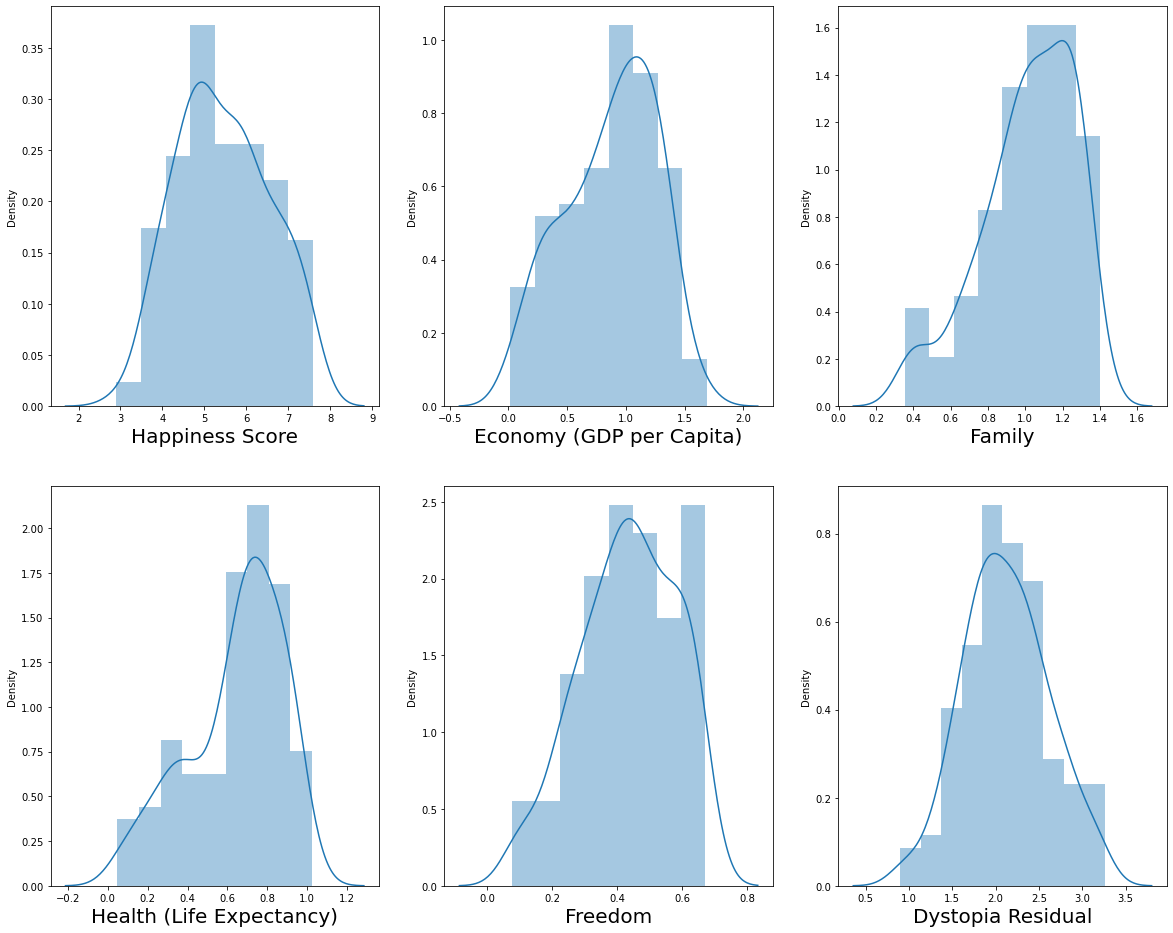

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_clean.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### all feature columns values are normally distributed

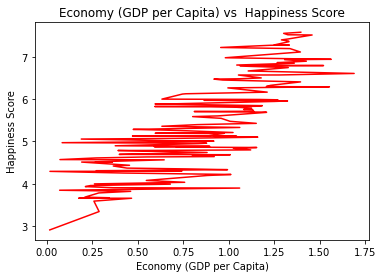

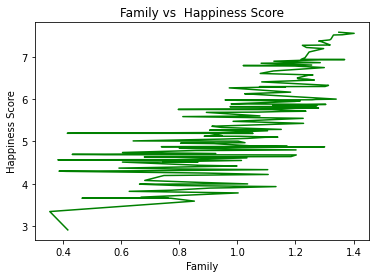

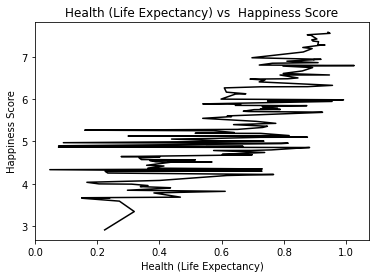

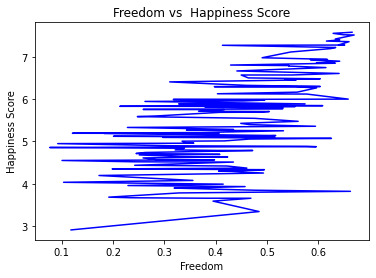

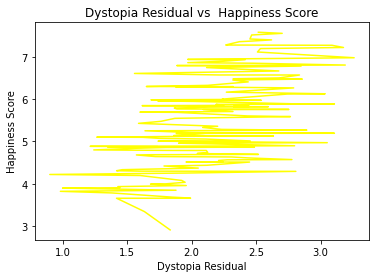

In [31]:
plt.plot(data_clean['Economy (GDP per Capita)'],data_clean['Happiness Score'],color='r')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Economy (GDP per Capita) vs  Happiness Score')
plt.show()
plt.plot(data_clean['Family'],data_clean['Happiness Score'],color='g')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Family vs  Happiness Score')
plt.show()
plt.plot(data_clean['Health (Life Expectancy)'],data_clean['Happiness Score'],color='black')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.title('Health (Life Expectancy) vs  Happiness Score')
plt.show()
plt.plot(data_clean['Freedom'],data_clean['Happiness Score'],color='blue')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.title('Freedom vs  Happiness Score')
plt.show()
plt.plot(data_clean['Dystopia Residual'],data_clean['Happiness Score'],color='yellow')
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness Score')
plt.title('Dystopia Residual vs  Happiness Score')
plt.show()

### From the above plot all I could deduce was that increase in feature value increases value of happiness score. 
### Basically regression problem, but linear and polynomial regression cannot be performed after observing the above graph, the error rate will be too high 

In [32]:
data_clean.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
Happiness Score,1.000000,0.784805,0.733407,0.743451,0.598689,0.531512
Economy (GDP per Capita),0.784805,1.000000,0.642582,0.800096,0.387082,0.055531
Family,0.733407,0.642582,1.000000,0.521218,0.471509,0.140395
Health (Life Expectancy),0.743451,0.800096,0.521218,1.000000,0.374307,0.083539
Freedom,0.598689,0.387082,0.471509,0.374307,1.000000,0.083616
Dystopia Residual,0.531512,0.055531,0.140395,0.083539,0.083616,1.000000


In [33]:
y = data_clean[['Happiness Score']]
x = data_clean.drop(columns = ['Happiness Score'])

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [35]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.469284,Economy (GDP per Capita)
1,1.921741,Family
2,2.829444,Health (Life Expectancy)
3,1.324997,Freedom
4,1.026773,Dystopia Residual


### No VIF was found. all the values are <5 that means no multicolinearity.

### performing pca

In [36]:
for i in range(2,6):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.7270075980127794
3 0.873302961591784
4 0.9644325728784762
5 1.0


### my personal choice to take pca component with data retention more than 95% so i will choose 4

In [37]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

### Now we will start with model selection and tuning training process.
### first find the most optimum model
### second we need to find the most optimum random state in train test split
### we shall evaluate model on r2 score
### Now write code to find best model along with the best hyper parameter

In [38]:
models=[DecisionTreeRegressor,RandomForestRegressor,KNeighborsRegressor,SVR]
param={DecisionTreeRegressor:{'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
                            'max_depth':[None,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
       KNeighborsRegressor:{"n_neighbors":range(1,30)},
      RandomForestRegressor:{"n_estimators":[10,100,500]},
      SVR:{"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}}

In [39]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [40]:
best_model_score=0
best_model=0
paramy=0
paramx=0
besty_random=0
for model in models:
    best_random=besttrain(model(),principalComponents,y)
    x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = best_random,test_size=0.20,shuffle=True)
    if len(param[model])!=0:
        clf = GridSearchCV(model(), param[model], cv=5,scoring="r2")
        clf.fit(principalComponents,y)
        dicty=clf.best_params_
        if len(dicty)==1:
            score=r2_score(y_test,model(*dicty.values()).fit(x_train,y_train).predict(x_test))
            paramx=dicty
        else:
            if model==SVR:
                score=r2_score(y_test,model(kernel=dicty['kernel'],C=dicty['C']).fit(x_train,y_train).predict(x_test))
                paramx=dicty
            else:
                score=r2_score(y_test,model(criterion=dicty['criterion'],max_depth=dicty['max_depth']).fit(x_train,y_train).predict(x_test))
                paramx=dicty
    else:
        score=r2_score(y_test,model().fit(x_train,y_train).predict(x_test))
        paramx=0
    if score>best_model_score:
        best_model_score=score
        best_model=model
        paramy=paramx
        besty_random=best_random
print('Best model:',best_model)
print('parameters used are:',paramy)
print('R2 score:',best_model_score)
print('train purpose:',besty_random)

Best model: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
parameters used are: {'n_neighbors': 3}
R2 score: 0.969971770456734
train purpose: 87


In [41]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 87,test_size=0.20,shuffle=True)
model=KNeighborsRegressor(3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))

coeff of determination is: 0.969971770456734
mean absolute error: 0.1419444444444444
mean squared error: 0.03341689259259259
root mean square error: 0.18280287905991138


In [42]:
joblib.dump(model,'Sadness.obj')

['Sadness.obj']

### From above codes i have determined the best model, its best parameters, best random state to split the data. obtained all the important metrics with the conclusion that KNN is most suited model for this problem.